In [18]:
import os
from pathlib import Path

print("CWD:", os.getcwd())
print("Items in CWD:", os.listdir())

DATA_DIR = Path("..") / "data"
print("DATA_DIR:", DATA_DIR)
print("Files in DATA_DIR:", list(DATA_DIR.iterdir()))


CWD: /Users/juliakelly/DataspellProjects/AC547_Final_Project/notebooks
Items in CWD: ['02_education_data.ipynb', 'SalaryDataFinal.ipynb', 'Accountant.Age.Stats.ipynb', 'Education.Stats.ipynb', 'salary data (2) (1).ipynb', '01_accountant_age.ipynb']
DATA_DIR: ../data
Files in DATA_DIR: [PosixPath('../data/C2024_a.csv'), PosixPath('../data/c2019_a_rv.csv'), PosixPath('../data/occupation_age_cleaned.csv'), PosixPath('../data/c2021_a_rv.csv'), PosixPath('../data/c2020_a_rv.csv'), PosixPath('../data/national_M2023_dl (1).xlsx'), PosixPath('../data/national_M2021_dl.xlsx'), PosixPath('../data/national_M2022_dl (1).xlsx'), PosixPath('../data/national_M2024_dl (2).xlsx'), PosixPath('../data/C2023_a_RV.csv')]


In [3]:
import pandas as pd

from pathlib import Path
import pandas as pd

DATA_DIR = Path("..") / "data"

df_age = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv")

df_age.head()


,year,sample,serial,cbserial,hhwt,cluster,strata,gq,pernum,perwt,age,occ,ind,inctot
0,2013,201301,2,154,51.0,2013000000021,250001,1,1,51.0,55,4700,5380,52000
1,2013,201301,2,154,51.0,2013000000021,250001,1,2,62.0,56,7240,8880,99000
2,2013,201301,3,156,449.0,2013000000031,170001,1,1,449.0,63,2310,7860,39930
3,2013,201301,4,160,16.0,2013000000041,220001,1,2,30.0,20,6260,770,1100
4,2013,201301,5,231,52.0,2013000000051,240001,1,1,52.0,78,8740,1880,3900


In [19]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("..") / "data"

# Load the cleaned file
occ_age = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv")

# -----------------------
# Standardize column names
# -----------------------
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# -----------------------
# Convert numeric columns
# -----------------------
numeric_cols = ["year", "age", "sex", "occ", "hwt", "serial", "cbserial"]
for col in numeric_cols:
    if col in occ_age.columns:
        occ_age[col] = pd.to_numeric(occ_age[col], errors="coerce")

# -----------------------
# Drop completely empty rows
# -----------------------
occ_age = occ_age.dropna(how="all")

# -----------------------
# Filter occupation = 800
# -----------------------
occ_800 = occ_age[occ_age["occ"] == 800]

# -----------------------
# Filter to reasonable working age group (18–65)
# -----------------------
occ_800 = occ_800[(occ_800["age"] >= 18) & (occ_800["age"] <= 65)]

# -----------------------
# Drop duplicate records
# -----------------------
occ_800 = occ_800.drop_duplicates()

print("Final shape:", occ_800.shape)
occ_800.head()



Final shape: (111007, 14)


,year,sample,serial,cbserial,hhwt,cluster,strata,gq,pernum,perwt,age,occ,ind,inctot
350,2013,201301,296,19027,7.0,2013000002961,80001,1,1,7.0,29,800,7280,45000
569,2013,201301,477,32173,23.0,2013000004771,250001,1,1,22.0,36,800,7280,73000
638,2013,201301,529,36068,76.0,2013000005291,270201,1,1,76.0,63,800,7280,79270
753,2013,201301,623,41625,61.0,2013000006231,70001,1,1,62.0,57,800,3895,31800
754,2013,201301,624,41649,17.0,2013000006241,50001,1,1,18.0,33,800,3580,51000


Latest year in data: 2018
Age counts:
age_group
18–24    360
25–29    612
30–34    713
35–39    651
40–44    636
45–49    738
50–54    759
55–59    859
60–65    763
Name: count, dtype: int64


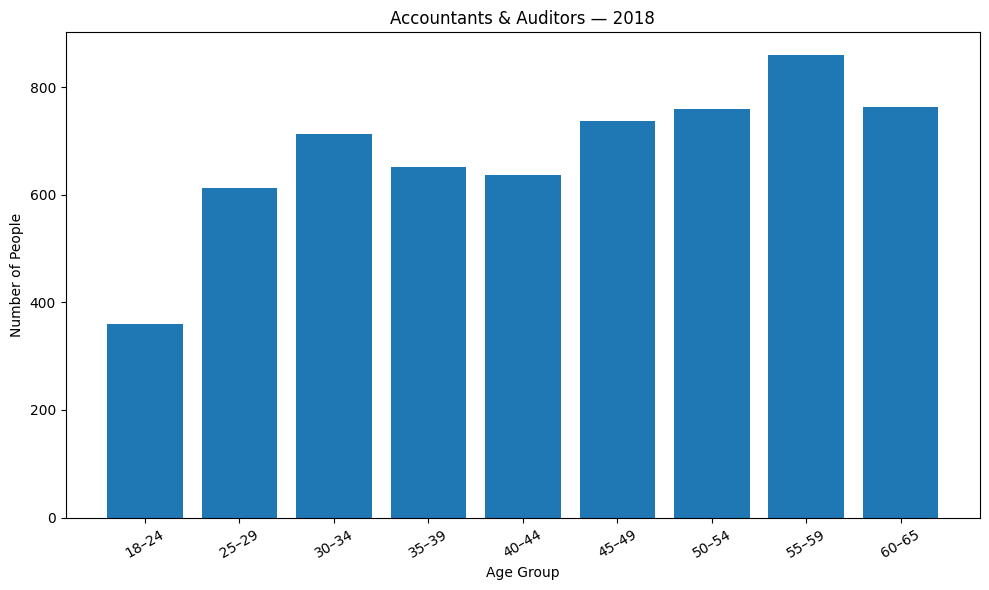

In [10]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path("..") / "data"

# Load cleaned dataset
occ_age = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors (OCC = 800)
occ_800 = occ_age[occ_age["occ"] == 800].copy()

# Make sure year is numeric
occ_800["year"] = pd.to_numeric(occ_800["year"], errors="coerce")

# Use the most recent year in the data
latest_year = int(occ_800["year"].max())
print("Latest year in data:", latest_year)

occ_latest = occ_800[occ_800["year"] == latest_year].copy()

# Keep working-age people
occ_latest = occ_latest[
    (occ_latest["age"] >= 18) &
    (occ_latest["age"] <= 65)
]

# Age bins
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–54","55–59","60–65"]

occ_latest["age_group"] = pd.cut(occ_latest["age"], bins=bins, labels=labels)

# Count age groups
age_counts = occ_latest["age_group"].value_counts().sort_index()
print("Age counts:")
print(age_counts)

# Plot
plt.figure(figsize=(10,6))
plt.bar(age_counts.index, age_counts.values)

plt.title(f"Accountants & Auditors — {latest_year}")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
occ_age = pd.read_csv("occupation_age.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors
occ_800 = occ_age[occ_age["occ"] == 800]

# Filter workforce ages
occ_800 = occ_800[
    (occ_800["age"] >= 18) &
    (occ_800["age"] <= 65)
]

# Compute average age per year (unweighted)
avg_age_year = (
    occ_800.groupby("year")["age"]
           .mean()
           .reset_index(name="avg_age")
)

# Plot
plt.figure(figsize=(10,6))
plt.plot(avg_age_year["year"], avg_age_year["avg_age"], marker="o", linewidth=2, color="#4E79A7")

plt.title("Average Age of Accountants & Auditors Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(alpha=0.3)
plt.xticks(avg_age_year["year"])  # show every year on axis

plt.tight_layout()
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'occupation_age.csv'

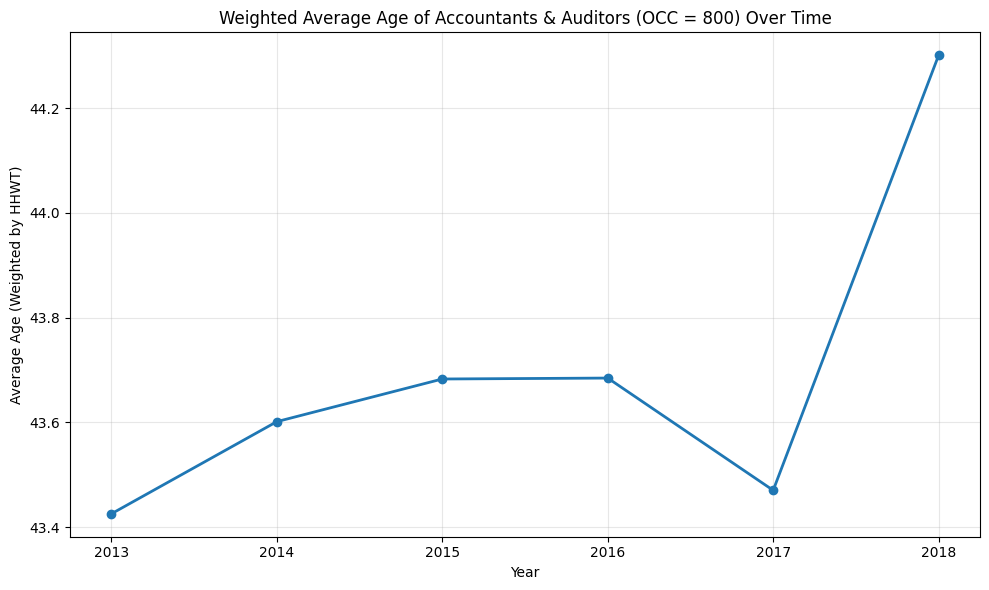

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Correct path & filename
DATA_DIR = Path("..") / "data"
occ_age = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors (OCC = 800)
occ_800 = occ_age[occ_age["occ"] == 800]

# Workforce ages
occ_800 = occ_800[(occ_800["age"] >= 18) & (occ_800["age"] <= 65)]

# Make sure age and hhwt are numeric
occ_800["age"] = pd.to_numeric(occ_800["age"], errors="coerce")
occ_800["hhwt"] = pd.to_numeric(occ_800["hhwt"], errors="coerce")

# -----------------------------
# Weighted average age by year
# -----------------------------
avg_age_weighted = (
    occ_800.groupby("year")[["age", "hhwt"]]
           .apply(lambda g: (g["age"] * g["hhwt"]).sum() / g["hhwt"].sum())
           .reset_index(name="avg_age_weighted")
)


# -----------------------------
# Plot weighted trend line
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(
    avg_age_weighted["year"],
    avg_age_weighted["avg_age_weighted"],
    marker="o",
    linewidth=2
)

plt.title("Weighted Average Age of Accountants & Auditors (OCC = 800) Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age (Weighted by HHWT)")
plt.grid(alpha=0.3)
plt.xticks(avg_age_weighted["year"])  # one tick per year
plt.tight_layout()
plt.show()


In [14]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Load and standardize
# -------------------------
DATA_DIR = Path("..") / "data"
occ_age = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv")

occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Make sure key columns are numeric
occ_age["year"] = pd.to_numeric(occ_age["year"], errors="coerce")
occ_age["age"]  = pd.to_numeric(occ_age["age"], errors="coerce")
occ_age["sex"]  = pd.to_numeric(occ_age["sex"], errors="coerce")

# -------------------------
# Filter to OCC = 800 and working ages
# -------------------------
base_mask = (
    (occ_age["occ"] == 800) &
    (occ_age["age"] >= 18) &
    (occ_age["age"] <= 65)
)

# Use the most recent year available in this subset
latest_year = int(occ_age.loc[base_mask, "year"].max())
print("Using year:", latest_year)

occ_800_year = occ_age[base_mask & (occ_age["year"] == latest_year)].copy()

# -------------------------
# Recode sex to labels (IPUMS: 1=Male, 2=Female)
# -------------------------
sex_map = {1: "Male", 2: "Female"}
occ_800_year["sex_label"] = occ_800_year["sex"].map(sex_map)

# -------------------------
# Create age groups
# -------------------------
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–54","55–59","60–65"]

occ_800_year["age_group"] = pd.cut(occ_800_year["age"], bins=bins, labels=labels)

# -------------------------
# Count by age group and sex
# -------------------------
age_sex_counts = (
    occ_800_year.groupby(["age_group", "sex_label"])
                .size()
                .unstack(fill_value=0)
                .reindex(labels)   # ensure correct age order
)

# -------------------------
# Plot side-by-side bars
# -------------------------
x = np.arange(len(age_sex_counts.index))
width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, age_sex_counts["Male"],   width=width, label="Male")
plt.bar(x + width/2, age_sex_counts["Female"], width=width, label="Female")

plt.title(f"Accountants & Auditors — {latest_year}\nby Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of People (Unweighted Count)")
plt.xticks(x, age_sex_counts.index, rotation=30)
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'sex'

In [16]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("../data")

df_test = pd.read_csv(DATA_DIR / "occupation_age_cleaned.csv", nrows=5)
print(df_test.columns.tolist())


['year', 'sample', 'serial', 'cbserial', 'hhwt', 'cluster', 'strata', 'gq', 'pernum', 'perwt', 'age', 'occ', 'ind', 'inctot']


In [17]:
import os
from pathlib import Path

DATA_DIR = Path("../data")
print("Files in data folder:")
print(os.listdir(DATA_DIR))


Files in data folder:
['C2024_a.csv', 'c2019_a_rv.csv', 'occupation_age_cleaned.csv', 'c2021_a_rv.csv', 'c2020_a_rv.csv', 'national_M2023_dl (1).xlsx', 'national_M2021_dl.xlsx', 'national_M2022_dl (1).xlsx', 'national_M2024_dl (2).xlsx', 'C2023_a_RV.csv']
